# Experiment 5 - KNN Regression
<b>Aadith Sukumar<br>
AIML A1 (2021-25)<br>
21070126003</b><br>
<br>The age of an abalone can be found by cutting its shell and counting the number of rings on
the shell. In the Abalone Dataset, you can find the age measurements of a large number of
abalones along with a lot of other physical measurements.
The goal of the project is to develop a model that can predict the age of an abalone based
purely on the other physical measurements. This would allow researchers to estimate the
abalone’s age without having to cut its shell and count the rings.
Use K-NN technique for regression to predict the age of an abalone.

## Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle as pkl

## Loading the Dataset

In [10]:
df = pd.read_csv('./data/abalone_data.csv')
# Assign column names
col_names = ["Sex", "Length", "Diameter", "Height", "Whole weight", "Shucked weight", "Viscera weight", "Shell weight", "Rings"]
df.columns = col_names
df.head(100)


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
...,...,...,...,...,...,...,...,...,...
95,M,0.535,0.435,0.150,0.7250,0.2690,0.1385,0.250,9
96,M,0.470,0.375,0.130,0.5230,0.2140,0.1320,0.145,8
97,M,0.470,0.370,0.130,0.5225,0.2010,0.1330,0.165,7
98,F,0.475,0.375,0.125,0.5785,0.2775,0.0850,0.155,10


## Data Preprocessing

In [4]:
print(df.shape)
df.isnull().sum()

(4176, 9)


Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

**No NULL Values in DataSet**

## Encoding

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,1,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


**Categorical data encoded as: {0:"I", 1:"F", 2:"M"}**

## Splitting the Dataset

In [6]:
from sklearn.model_selection import train_test_split
X = df.drop('Rings', axis=1)
y = df['Rings']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## KNN Regression

In [7]:
# KNN Regression
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

# Predictions
y_pred = knn.predict(X_test)

# RMSE
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: %f" % (rmse))

RMSE: 2.236421


In [8]:
# Saving the model
pkl.dump(knn, open('./models/knn_regression_abalone.pkl', 'wb'))


## Plot

C:\Users\AADITH~1\AppData\Local\Temp/ipykernel_19736/152600631.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color='red', label='Actual Data')


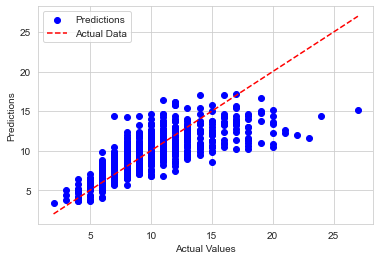

In [9]:
# Plotting the predicted and actual values
plt.scatter(y_test, y_pred, color='blue', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color='red', label='Actual Data')
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.legend()
plt.show()


**Result:** We can notice that applying KNN Regression gives an RMSE value of 2.23. It is able to predict with a fairly good accuracy. 

---